# Notes

This notebook was created to try pingouin stats package

# Files

In [1]:
! ls | grep csv

big-df-by-expt.csv
big-df-by-expt-with-stab.csv
big-df-by-roi.csv
control-mse.csv
creb-mse.csv
csv_backup
decoded2020-all.csv
decoded2020-place.csv
decode-mse-10k.csv
decode-mse-50-100-500-1000.csv
df-by-expt-RF-SUP-DEEP.csv
fig-list.csv
old_csvs


# Initialization

## standard variables and imports

In [3]:
# removed creb imports b/c python3
colors = 

# set seaborn pallette
sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

# stats
%load_ext rpy2.ipython

NameError: name 'colors' is not defined

In [4]:
sys.path.insert(0, '/home/matt/code/analysis/mjd/')
import lab.mjd_scripts.pandas_helpers as mjd_pandas

ModuleNotFoundError: No module named 'lab'

## notebook variables, functions, imports

In [3]:
# just for pcse
import sys
sys.path.insert(0, '/home/matt/code/analysis/analysis-scripts')
import place_cell_data_save_expt as pcse
import place_cell_data_save as pcs
#import pandas_helpers as pd_help

# variables for plotting 
activity_labels=['Number of place fields',
      'Place field width',
      'Specificity',
      'Sensitivity',
      'Sparsity',
       'Place cell Fraction',
       'Spatial information',
       'Circular variance']

keys=['n_place_fields',
      'pf_width',
      'specificity',
      'sensitivity',
      'sparsity',
      'pc_percentage',
       'spatial_information_pc',
       'circular_variance_pc']

## csv

In [9]:
dfr = pd.read_csv('big-df-by-roi.csv') # by roi
df = pd.read_csv('big-df-by-expt.csv') # by expt

df.drop(df.query('trial_id == 12813').index,inplace=True) # filter bad tial

print(df.shape)
print(df.columns.values)



(267, 40)
['Unnamed: 0' 'mouseID' 'grp' 'trial_id' 'session' 'day' 'condition'
 'session_day' 'startTime' 'experimentType' 'sensitivity' 'specificity'
 'sparsity' 'pf_width' 'trans_auc' 'trans_amplitude' 'trans_duration'
 'trans_frequency' 'trans_auc_nr' 'trans_amplitude_nr' 'trans_duration_nr'
 'trans_frequency_nr' 'trans_auc_all' 'trans_amplitude_all'
 'trans_duration_all' 'trans_frequency_all' 'circ_var' 'circ_var_p'
 'spatial_information' 'n_place_fields' 'fraction_near_rads_8'
 'fraction_near_norm_05' 'fraction_near_norm_10' 'lick_reward_fraction'
 'anticipatory_licking' 'activity_centroid_reward_distance'
 'centroid_reward_distance' 'pc_percentage' 'spatial_information_pc'
 'circular_variance_pc']


# Try stats

In [1]:
import pingouin as pg

## outlier

In [30]:
df.query("pc_percentage <.05").shape

(1, 40)

In [25]:
df_clean = df[~df.eval("pc_percentage <.05")]

(266, 40)

## describe

In [19]:
df.groupby("grp").pc_percentage.describe()

,count,mean,std,min,25%,50%,75%,max
grp,,,,,,,,
CREB,99.0,0.206888,0.042088,0.097643,0.175752,0.206226,0.238080,0.291829
Control,87.0,0.281673,0.063890,0.009434,0.246702,0.278302,0.325654,0.421053
dn-CREB,81.0,0.296479,0.062368,0.119048,0.282258,0.309859,0.342742,0.390728


grp
CREB       AxesSubplot(0.125,0.125;0.775x0.755)
Control    AxesSubplot(0.125,0.125;0.775x0.755)
dn-CREB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pc_percentage, dtype: object

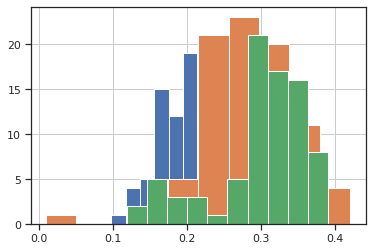

In [20]:
df.groupby("grp").pc_percentage.hist()

## parametric

In [12]:
pg.anova(data=df, between='grp', dv='pc_percentage')

,Source,ddof1,ddof2,F,p-unc,np2
0,grp,2,264,67.477,2.137238e-24,0.338


In [13]:
pg.pairwise_tukey(data=df, between='grp', dv='pc_percentage')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,CREB,Control,0.207,0.282,-0.075,0.008,two-sided,-9.291,0.001000,-1.360
1,CREB,dn-CREB,0.207,0.296,-0.090,0.008,two-sided,-10.918,0.001000,-1.629
2,Control,dn-CREB,0.282,0.296,-0.015,0.008,two-sided,-1.751,0.186972,-0.269


## non-parametric

In [14]:
pg.welch_anova(data=df, between='grp', dv='pc_percentage')

,Source,ddof1,ddof2,F,p-unc
0,grp,2,159.109,81.782,3.727277e-25


In [15]:
pg.pairwise_gameshowell(data=df, between='grp', dv='pc_percentage')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,CREB,Control,0.207,0.282,-0.075,0.006,two-sided,-9.289,145.527,0.001000,-1.360
1,CREB,dn-CREB,0.207,0.296,-0.090,0.006,two-sided,-11.035,135.379,0.001000,-1.646
2,Control,dn-CREB,0.282,0.296,-0.015,0.007,two-sided,-1.520,165.622,0.282524,-0.234


# WeakStrong

In [19]:
df = pd.read_csv('WeakStrong-Session1-thresh1.0-multi8.csv')
df_s = df.query("sess1_multi =='strong'")
df_w = df.query("sess1_multi =='weak'")

In [25]:

key = 'spatial_information'
groupby = ['grp','condition']

In [29]:
df_s['grp'].unique()


array(['Control', 'CREB', 'dn-CREB'], dtype=object)

In [33]:
pg.homoscedasticity(df_s, dv=key, group="condition")

,W,pval,equal_var
levene,5.611,0.017898,False


In [44]:
a = [g.values for n,g in df_s.groupby(groupby)[key]]

pg.homoscedasticity(a)

In [46]:
stats

,W,pval,equal_var
levene,4.337,0.000615,False


In [24]:

pg.anova(data=df_w, between=groupby, dv=key)

,Source,SS,DF,MS,F,p-unc,np2
0,grp,7.168,2.0,3.584,6.122,2.261491e-03,0.010
1,condition,37.908,1.0,37.908,64.747,1.984892e-15,0.050
2,grp * condition,5.030,2.0,2.515,4.295,1.383507e-02,0.007
3,Residual,722.477,1234.0,0.585,NaN,NaN,NaN


In [23]:
pg.pairwise_tukey(
    data=df_s.query("condition=='2'"), between='grp', dv='spatial_information')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,CREB,Control,1.975,1.587,0.388,0.053,two-sided,7.287,0.001,0.472
1,CREB,dn-CREB,1.975,1.964,0.011,0.046,two-sided,0.237,0.900,0.013
2,Control,dn-CREB,1.587,1.964,-0.377,0.050,two-sided,-7.528,0.001,-0.458
